In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=41a8921294355d63a617bb3934e7768b640df778fefb90035b9c1db346eb24f2
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [2]:
from rouge_score import rouge_scorer
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
summaries_sentiment_analysis = pd.read_csv("/content/drive/MyDrive/opinosis_tilic/relatorio_analise_sentimentos.csv")

In [5]:
summaries_sentiment_analysis.head(3)

,Unnamed: 0,Assunto,LLM Extrativo,LLM Extrativo Nota,LLM Abstrativo,LLM Abstrativo Nota,Opinosis,Opinosis Nota,Humano_Abstrativo_1,Humano_Abstrativo_1 Nota,...,Texto Humano_Abstrativo_1,Texto Humano_Extrativo_1,Texto Humano_Abstrativo_2,Texto Humano_Extrativo_2,Texto Humano_Abstrativo_3,Texto Humano_Extrativo_3,Texto Humano_Abstrativo_4,Texto Humano_Extrativo_4,Texto Humano_Abstrativo_5,Texto Humano_Extrativo_5
0,0,1984,POSITIVE,0.997,POSITIVE,0.997,POSITIVE,0.883,POSITIVE,0.890,...,O livro 1984 recebeu boas críticas pela maiori...,""" Um ótimo livro, além de ser um ótimo alerta ...",﻿Mais da metade dos leitores do livro “1984” a...,﻿O livro talvez desanime leitores mais afoito ...,"O livro 1984 apresenta, de forma interessante,...",Contém medo e suspense desde a primeira linha....,De forma geral a história do livro 1984 é con...,﻿A história em si é interessante.\nContém medo...,"﻿Sobre o livro 1984, escrito por George Orwell...",A história em si é interessante.\nBom livro.\n...
1,1,Capitaes-da-Areia,POSITIVE,0.990,POSITIVE,0.997,POSITIVE,0.947,POSITIVE,0.951,...,Capitães da Areia é um livro brasileiro escrit...,A narrativa nos surpreende com o decorrer de o...,O livro Capitães da Areia considerado um bom l...,﻿Um livro muito bom que retrata a cruel realid...,"﻿O livro Capitães da Areia, de maneira envolve...","﻿Publicado em 1937, a obra parece conter os in...","Em geral, os usuários afirmam que a obra ""Capi...","Eu adorei esse livro quando li, foi um conselh...","﻿O livro Capitães da Areia, de autoria do reco...",﻿Um livro muito bom que retrata a cruel realid...
2,2,Crepusculo,NEGATIVE,0.996,POSITIVE,0.937,POSITIVE,0.939,NEGATIVE,0.978,...,﻿A maioria definitivamente não gostou do livro...,"﻿A história tem vários furos e, se você parar ...",﻿O livro Crepúsculo conquistou milhares de pes...,"﻿História clichê, recheada de coisas impossíve...",﻿O livro Crepúsculo recebeu comentários negati...,Abandonei o livro crepúsculo por que eu gosto ...,A grande maioria dos leitores avaliaram negati...,Decepcionante.\nTédio ...\nA história tem vári...,"﻿Apesar de haver quem goste de Crepúsculo, o l...","Intenso, romantico, inesperado, brilhante, apa..."


### Calculating the mode of sentiment analysis evaluations (and therefore the most frequent polarity) considering the results of sentiment analysis evaluation with human examples

Below, the original dataset was copied for analysis.


In [83]:
copy_summaries_sentiment_analysis = summaries_sentiment_analysis.copy()
drop_columns = copy_summaries_sentiment_analysis.columns.where(copy_summaries_sentiment_analysis.columns.str.contains("Texto")).dropna()
copy_summaries_sentiment_analysis.drop(columns=drop_columns, inplace=True)

drop_columns = copy_summaries_sentiment_analysis.columns.where(copy_summaries_sentiment_analysis.columns.str.contains("Nota")).dropna()
copy_summaries_sentiment_analysis.drop(columns=drop_columns, inplace=True)

drop_columns = copy_summaries_sentiment_analysis.columns.where(copy_summaries_sentiment_analysis.columns.str.contains("Unnamed")).dropna()
copy_summaries_sentiment_analysis.drop(columns=drop_columns, inplace=True)

In [84]:
copy_summaries_sentiment_analysis.head(3)

,Assunto,LLM Extrativo,LLM Abstrativo,Opinosis,Humano_Abstrativo_1,Humano_Extrativo_1,Humano_Abstrativo_2,Humano_Extrativo_2,Humano_Abstrativo_3,Humano_Extrativo_3,Humano_Abstrativo_4,Humano_Extrativo_4,Humano_Abstrativo_5,Humano_Extrativo_5
0,1984,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
1,Capitaes-da-Areia,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
2,Crepusculo,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE


Only the columns that concern results referring to human evaluations were filtered.

In [85]:
df_human = copy_summaries_sentiment_analysis[copy_summaries_sentiment_analysis.columns.where(copy_summaries_sentiment_analysis.columns.str.contains("Humano")).dropna()]
df_human.head(3)

,Humano_Abstrativo_1,Humano_Extrativo_1,Humano_Abstrativo_2,Humano_Extrativo_2,Humano_Abstrativo_3,Humano_Extrativo_3,Humano_Abstrativo_4,Humano_Extrativo_4,Humano_Abstrativo_5,Humano_Extrativo_5
0,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
1,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
2,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE


The separation was made between the types of summaries (abstractive and extractive) and the mode of the evaluations. With this, the most frequent polarities of the human summaries were obtained for each subject.

In [86]:
df_human_extrative = df_human[df_human.columns.where(df_human.columns.str.contains("Humano_Extrativo")).dropna()]
df_human_extrative = df_human_extrative.mode(axis=1)[0]
df_human_extrative.head(3)

,0
0,POSITIVE
1,POSITIVE
2,NEGATIVE


In [87]:
df_human_abstractive = df_human[df_human.columns.where(df_human.columns.str.contains("Humano_Abstrativo")).dropna()]
df_human_abstractive = df_human_abstractive.mode(axis=1)[0]
df_human_abstractive.head(3)

,0
0,POSITIVE
1,POSITIVE
2,NEGATIVE


The summary types were concatenated for later use.

In [88]:
df_human = pd.concat([df_human_extrative, df_human_abstractive], axis=1)
df_human.columns = ['Humano_Extrativo', 'Humano_Abstrativo']
df_human.head(3)

,Humano_Extrativo,Humano_Abstrativo
0,POSITIVE,POSITIVE
1,POSITIVE,POSITIVE
2,NEGATIVE,NEGATIVE


Final result with the mode:

In [89]:
df_human

,Humano_Extrativo,Humano_Abstrativo
0,POSITIVE,POSITIVE
1,POSITIVE,POSITIVE
2,NEGATIVE,NEGATIVE
3,POSITIVE,POSITIVE
4,POSITIVE,POSITIVE
5,POSITIVE,POSITIVE
6,POSITIVE,POSITIVE
7,POSITIVE,POSITIVE
8,POSITIVE,POSITIVE
9,POSITIVE,POSITIVE


# Question 1: Is an LLM's sentiment analysis similar to a human's?

Comparison considering only the POSITIVE and NEGATIVE labels and dropping Opinosis related data.

In [90]:
df_llm_human = copy_summaries_sentiment_analysis.drop("Opinosis", axis=1)

Creating the excerpt of the dataset to be evaluated, considering only the evaluations of LLM and human summaries.

In [93]:
drop_columns = df_llm_human.columns.where(df_llm_human.columns.str.contains("Humano")).dropna()
df_llm_human.drop(columns=drop_columns, inplace=True)
df_llm_human["Humano_Abstrativo"] = df_human_abstractive
df_llm_human["Humano_Extrativo"] = df_human_extrative

In [92]:
df_llm_human

,Assunto,LLM Extrativo,LLM Abstrativo,Humano_Abstrativo,Humano_Extrativo
0,1984,POSITIVE,POSITIVE,POSITIVE,POSITIVE
1,Capitaes-da-Areia,POSITIVE,POSITIVE,POSITIVE,POSITIVE
2,Crepusculo,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
3,Ensaio-Sobre-a-Cegueira,POSITIVE,POSITIVE,POSITIVE,POSITIVE
4,Fala-Serio-Amiga,POSITIVE,POSITIVE,POSITIVE,POSITIVE
5,Fala-Serio-Amor,POSITIVE,POSITIVE,POSITIVE,POSITIVE
6,Fala-Serio-Mae,NEGATIVE,POSITIVE,POSITIVE,POSITIVE
7,Fala-Serio-Pai,POSITIVE,POSITIVE,POSITIVE,POSITIVE
8,Fala-Serio-Professor,POSITIVE,POSITIVE,POSITIVE,POSITIVE
9,Galaxy-SIII,POSITIVE,POSITIVE,POSITIVE,POSITIVE


In [94]:
matches_extrative = (df_llm_human[f'LLM Extrativo'] == df_llm_human[f'Humano_Extrativo'])
matches_abstractive = (df_llm_human[f'LLM Abstrativo'] == df_llm_human[f'Humano_Abstrativo'])

matches_extrative= float((matches_extrative.sum()/17)*100)
matches_abstractive= float((matches_abstractive.sum()/17)*100)

In [95]:
print(matches_abstractive)

88.23529411764706


In [96]:
plot_df = pd.DataFrame({
    'Tipo de resumo': ['Extrativo', 'Abstrativo'],
    'Porcentagem de concordância': [matches_extrative, matches_abstractive]
})

/tmp/ipython-input-1474264234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de resumo', y='Porcentagem de concordância', data=plot_df, palette='viridis')


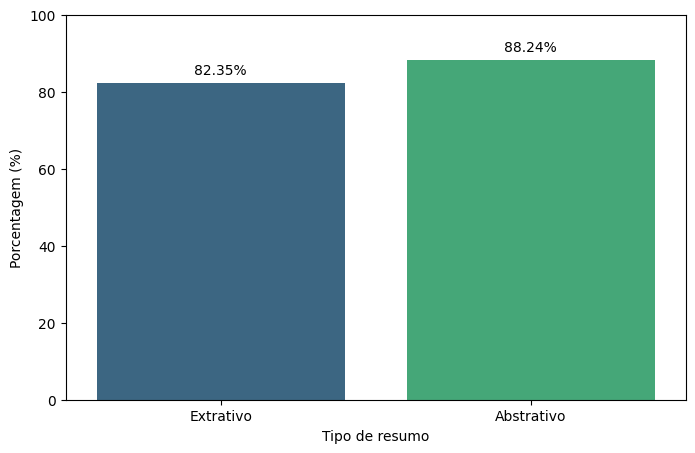

In [97]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 100)

ax = sns.barplot(x='Tipo de resumo', y='Porcentagem de concordância', data=plot_df, palette='viridis')

#plt.title("Concordância (%) entre resumos gerados por LLMs e resumos humanos para cada classe de resumo")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Tipo de resumo")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                fontsize=10, color='black')

# Question 2: When we use opinosis, are the responses similar to human ones in terms of sentiment analysis?

Using the mode columns created in question 1, the same steps were performed as in question 1 to prepare the excerpt of the dataset.

In [98]:
copy_summaries_sentiment_analysis.head(3)

,Assunto,LLM Extrativo,LLM Abstrativo,Opinosis,Humano_Abstrativo_1,Humano_Extrativo_1,Humano_Abstrativo_2,Humano_Extrativo_2,Humano_Abstrativo_3,Humano_Extrativo_3,Humano_Abstrativo_4,Humano_Extrativo_4,Humano_Abstrativo_5,Humano_Extrativo_5
0,1984,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
1,Capitaes-da-Areia,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
2,Crepusculo,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE


In [102]:
df_opinosis_human = copy_summaries_sentiment_analysis.drop("LLM Abstrativo", axis=1)
df_opinosis_human = df_opinosis_human.drop("LLM Extrativo", axis=1)

In [103]:
drop_columns = df_opinosis_human.columns.where(df_opinosis_human.columns.str.contains("Humano")).dropna()
df_opinosis_human.drop(columns=drop_columns, inplace=True)
df_opinosis_human["Humano_Abstrativo"] = df_human_abstractive
df_opinosis_human["Humano_Extrativo"] = df_human_extrative

In [104]:
df_opinosis_human

,Assunto,Opinosis,Humano_Abstrativo,Humano_Extrativo
0,1984,POSITIVE,POSITIVE,POSITIVE
1,Capitaes-da-Areia,POSITIVE,POSITIVE,POSITIVE
2,Crepusculo,POSITIVE,NEGATIVE,NEGATIVE
3,Ensaio-Sobre-a-Cegueira,POSITIVE,POSITIVE,POSITIVE
4,Fala-Serio-Amiga,NEGATIVE,POSITIVE,POSITIVE
5,Fala-Serio-Amor,POSITIVE,POSITIVE,POSITIVE
6,Fala-Serio-Mae,NEGATIVE,POSITIVE,POSITIVE
7,Fala-Serio-Pai,POSITIVE,POSITIVE,POSITIVE
8,Fala-Serio-Professor,POSITIVE,POSITIVE,POSITIVE
9,Galaxy-SIII,NEGATIVE,POSITIVE,POSITIVE


In [105]:
matches_extrative = (df_opinosis_human[f'Opinosis'] == df_opinosis_human[f'Humano_Extrativo'])
matches_abstractive = (df_opinosis_human[f'Opinosis'] == df_opinosis_human[f'Humano_Abstrativo'])

matches_extrative= float((matches_extrative.sum()/17)*100)
matches_abstractive= float((matches_abstractive.sum()/17)*100)

In [106]:
plot_df = pd.DataFrame({
    'Tipo de resumo': ['Extrativo', 'Abstrativo'],
    'Porcentagem de concordância': [matches_extrative, matches_abstractive]
})

/tmp/ipython-input-1212868409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de resumo', y='Porcentagem de concordância', data=plot_df, palette='viridis')


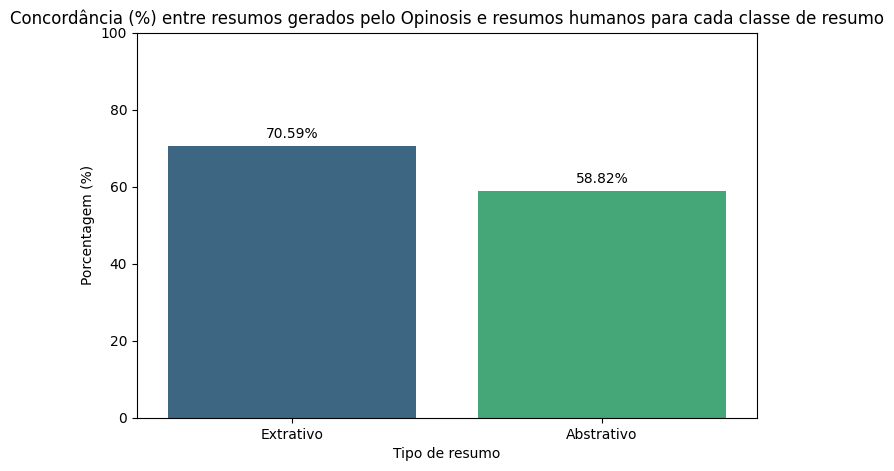

In [107]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 100)

ax = sns.barplot(x='Tipo de resumo', y='Porcentagem de concordância', data=plot_df, palette='viridis')

plt.title("Concordância (%) entre resumos gerados pelo Opinosis e resumos humanos para cada classe de resumo")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Tipo de resumo")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                fontsize=10, color='black')

# ROUGE

In [108]:
import numpy as np

In [109]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'])

In [110]:
df_texts = summaries_sentiment_analysis[summaries_sentiment_analysis.columns.where(summaries_sentiment_analysis.columns.str.contains("Texto")).dropna()]

In [111]:
df_texts.head(3)

,Texto LLM Extrativo,Texto LLM Abstrativo,Texto Opinosis,Texto Humano_Abstrativo_1,Texto Humano_Extrativo_1,Texto Humano_Abstrativo_2,Texto Humano_Extrativo_2,Texto Humano_Abstrativo_3,Texto Humano_Extrativo_3,Texto Humano_Abstrativo_4,Texto Humano_Extrativo_4,Texto Humano_Abstrativo_5,Texto Humano_Extrativo_5
0,1984 é um livro que apresenta uma visão de um ...,1984 é um livro que apresenta uma visão distóp...,"o livro, adaptaram pro cinema, é logico que é ...",O livro 1984 recebeu boas críticas pela maiori...,""" Um ótimo livro, além de ser um ótimo alerta ...",﻿Mais da metade dos leitores do livro “1984” a...,﻿O livro talvez desanime leitores mais afoito ...,"O livro 1984 apresenta, de forma interessante,...",Contém medo e suspense desde a primeira linha....,De forma geral a história do livro 1984 é con...,﻿A história em si é interessante.\nContém medo...,"﻿Sobre o livro 1984, escrito por George Orwell...",A história em si é interessante.\nBom livro.\n...
1,Livro que retrata a realidade de os garotos de...,O livro retrata a realidade de vida de um grup...,"livro, um conselho de um garoto que eu conheci...",Capitães da Areia é um livro brasileiro escrit...,A narrativa nos surpreende com o decorrer de o...,O livro Capitães da Areia considerado um bom l...,﻿Um livro muito bom que retrata a cruel realid...,"﻿O livro Capitães da Areia, de maneira envolve...","﻿Publicado em 1937, a obra parece conter os in...","Em geral, os usuários afirmam que a obra ""Capi...","Eu adorei esse livro quando li, foi um conselh...","﻿O livro Capitães da Areia, de autoria do reco...",﻿Um livro muito bom que retrata a cruel realid...
2,O livro Crepusculo é um romance inexplicavelme...,O livro Crepusculo é um romance fantástico que...,"o que se ouve, se tá em a moda gostar ou não g...",﻿A maioria definitivamente não gostou do livro...,"﻿A história tem vários furos e, se você parar ...",﻿O livro Crepúsculo conquistou milhares de pes...,"﻿História clichê, recheada de coisas impossíve...",﻿O livro Crepúsculo recebeu comentários negati...,Abandonei o livro crepúsculo por que eu gosto ...,A grande maioria dos leitores avaliaram negati...,Decepcionante.\nTédio ...\nA história tem vári...,"﻿Apesar de haver quem goste de Crepúsculo, o l...","Intenso, romantico, inesperado, brilhante, apa..."


### ROUGE with LLM texts

In [112]:
df_rouge_llm = df_texts.copy()
df_rouge_llm = df_rouge_llm.drop("Texto Opinosis", axis=1)
df_rouge_llm.head(3)

,Texto LLM Extrativo,Texto LLM Abstrativo,Texto Humano_Abstrativo_1,Texto Humano_Extrativo_1,Texto Humano_Abstrativo_2,Texto Humano_Extrativo_2,Texto Humano_Abstrativo_3,Texto Humano_Extrativo_3,Texto Humano_Abstrativo_4,Texto Humano_Extrativo_4,Texto Humano_Abstrativo_5,Texto Humano_Extrativo_5
0,1984 é um livro que apresenta uma visão de um ...,1984 é um livro que apresenta uma visão distóp...,O livro 1984 recebeu boas críticas pela maiori...,""" Um ótimo livro, além de ser um ótimo alerta ...",﻿Mais da metade dos leitores do livro “1984” a...,﻿O livro talvez desanime leitores mais afoito ...,"O livro 1984 apresenta, de forma interessante,...",Contém medo e suspense desde a primeira linha....,De forma geral a história do livro 1984 é con...,﻿A história em si é interessante.\nContém medo...,"﻿Sobre o livro 1984, escrito por George Orwell...",A história em si é interessante.\nBom livro.\n...
1,Livro que retrata a realidade de os garotos de...,O livro retrata a realidade de vida de um grup...,Capitães da Areia é um livro brasileiro escrit...,A narrativa nos surpreende com o decorrer de o...,O livro Capitães da Areia considerado um bom l...,﻿Um livro muito bom que retrata a cruel realid...,"﻿O livro Capitães da Areia, de maneira envolve...","﻿Publicado em 1937, a obra parece conter os in...","Em geral, os usuários afirmam que a obra ""Capi...","Eu adorei esse livro quando li, foi um conselh...","﻿O livro Capitães da Areia, de autoria do reco...",﻿Um livro muito bom que retrata a cruel realid...
2,O livro Crepusculo é um romance inexplicavelme...,O livro Crepusculo é um romance fantástico que...,﻿A maioria definitivamente não gostou do livro...,"﻿A história tem vários furos e, se você parar ...",﻿O livro Crepúsculo conquistou milhares de pes...,"﻿História clichê, recheada de coisas impossíve...",﻿O livro Crepúsculo recebeu comentários negati...,Abandonei o livro crepúsculo por que eu gosto ...,A grande maioria dos leitores avaliaram negati...,Decepcionante.\nTédio ...\nA história tem vári...,"﻿Apesar de haver quem goste de Crepúsculo, o l...","Intenso, romantico, inesperado, brilhante, apa..."


In [115]:
rouge_llm = {
      'extrative': {
          'rouge1': {
              'precision': [],
              'recall': [],
              'f1-score': []
          },
          'rougeL':  {
              'precision': [],
              'recall': [],
              'f1-score': []
          }
      },
      'abstrative': {
          'rouge1': {
              'precision': [],
              'recall': [],
              'f1-score': []
          },
          'rougeL':  {
              'precision': [],
              'recall': [],
              'f1-score': []
          }
      }
  }
rouge_metrics = ['rouge1', 'rougeL']

In [116]:
for row_index in range(df_rouge_llm.shape[0]):
  text_extrative = df_rouge_llm.iloc[row_index, 0]
  text_abstractive = df_rouge_llm.iloc[row_index, 1]
  text_human = df_rouge_llm.iloc[row_index, 2:]
  text_human = text_human.to_list()

  text_human_abstractive = [text_human[i] for i in range(len(text_human)) if i % 2 == 0]
  text_human_extrative = [text_human[i] for i in range(len(text_human)) if i % 2 != 0]

  for text_human in text_human_extrative:
    scores = scorer.score(text_human, text_extrative)
    for metrica in rouge_metrics:
      metric_score_obj = scores[metrica]

      rouge_llm['extrative'][metrica]['precision'].append(metric_score_obj.precision)
      rouge_llm['extrative'][metrica]['recall'].append(metric_score_obj.recall)
      rouge_llm['extrative'][metrica]['f1-score'].append(metric_score_obj.fmeasure)

  for text_human in text_human_abstractive:
    scores = scorer.score(text_human, text_abstractive)
    for metrica in rouge_metrics:
      metric_score_obj = scores[metrica]

      rouge_llm['abstrative'][metrica]['precision'].append(metric_score_obj.precision)
      rouge_llm['abstrative'][metrica]['recall'].append(metric_score_obj.recall)
      rouge_llm['abstrative'][metrica]['f1-score'].append(metric_score_obj.fmeasure)

In [118]:
len(rouge_llm['extrative']['rouge1']['precision'])

85

In [119]:
for resume_type in ['extrative', 'abstrative']:
    for metric_name in rouge_metrics:
      rouge_llm[resume_type][metric_name]['precision'] = float(np.mean(rouge_llm[resume_type][metric_name]['precision']))
      rouge_llm[resume_type][metric_name]['recall'] = float(np.mean(rouge_llm[resume_type][metric_name]['recall']))
      rouge_llm[resume_type][metric_name]['f1-score'] = float(np.mean(rouge_llm[resume_type][metric_name]['f1-score']))

In [120]:
rouge_llm

{'extrative': {'rouge1': {'precision': 0.4621858977138649,
   'recall': 0.26175224787275164,
   'f1-score': 0.321049519807865},
  'rougeL': {'precision': 0.2893629912354395,
   'recall': 0.1627472495648839,
   'f1-score': 0.20007683287984526}},
 'abstrative': {'rouge1': {'precision': 0.4832769709515688,
   'recall': 0.25392497591461655,
   'f1-score': 0.325346791503446},
  'rougeL': {'precision': 0.2975010694510436,
   'recall': 0.15348623873763292,
   'f1-score': 0.19779243016988707}}}

In [122]:
records = []
for resume_type, rouge_metrics in rouge_llm.items():
    for metric, values in rouge_metrics.items():
        record = {
                'Tipo de resumo': resume_type,
                'ROUGE': metric,
                'Precisao': values['precision'],
                'Recall': values['recall'],
                'F1-Score': values['f1-score']
        }
        records.append(record)

In [123]:
pd.DataFrame(records)

,Tipo de resumo,ROUGE,Precisao,Recall,F1-Score
0,extrative,rouge1,0.462186,0.261752,0.321050
1,extrative,rougeL,0.289363,0.162747,0.200077
2,abstrative,rouge1,0.483277,0.253925,0.325347
3,abstrative,rougeL,0.297501,0.153486,0.197792


### ROUGE for Opinosis

In [124]:
df_rouge_opinosis = df_texts.copy()
df_rouge_opinosis.head(3)

,Texto LLM Extrativo,Texto LLM Abstrativo,Texto Opinosis,Texto Humano_Abstrativo_1,Texto Humano_Extrativo_1,Texto Humano_Abstrativo_2,Texto Humano_Extrativo_2,Texto Humano_Abstrativo_3,Texto Humano_Extrativo_3,Texto Humano_Abstrativo_4,Texto Humano_Extrativo_4,Texto Humano_Abstrativo_5,Texto Humano_Extrativo_5
0,1984 é um livro que apresenta uma visão de um ...,1984 é um livro que apresenta uma visão distóp...,"o livro, adaptaram pro cinema, é logico que é ...",O livro 1984 recebeu boas críticas pela maiori...,""" Um ótimo livro, além de ser um ótimo alerta ...",﻿Mais da metade dos leitores do livro “1984” a...,﻿O livro talvez desanime leitores mais afoito ...,"O livro 1984 apresenta, de forma interessante,...",Contém medo e suspense desde a primeira linha....,De forma geral a história do livro 1984 é con...,﻿A história em si é interessante.\nContém medo...,"﻿Sobre o livro 1984, escrito por George Orwell...",A história em si é interessante.\nBom livro.\n...
1,Livro que retrata a realidade de os garotos de...,O livro retrata a realidade de vida de um grup...,"livro, um conselho de um garoto que eu conheci...",Capitães da Areia é um livro brasileiro escrit...,A narrativa nos surpreende com o decorrer de o...,O livro Capitães da Areia considerado um bom l...,﻿Um livro muito bom que retrata a cruel realid...,"﻿O livro Capitães da Areia, de maneira envolve...","﻿Publicado em 1937, a obra parece conter os in...","Em geral, os usuários afirmam que a obra ""Capi...","Eu adorei esse livro quando li, foi um conselh...","﻿O livro Capitães da Areia, de autoria do reco...",﻿Um livro muito bom que retrata a cruel realid...
2,O livro Crepusculo é um romance inexplicavelme...,O livro Crepusculo é um romance fantástico que...,"o que se ouve, se tá em a moda gostar ou não g...",﻿A maioria definitivamente não gostou do livro...,"﻿A história tem vários furos e, se você parar ...",﻿O livro Crepúsculo conquistou milhares de pes...,"﻿História clichê, recheada de coisas impossíve...",﻿O livro Crepúsculo recebeu comentários negati...,Abandonei o livro crepúsculo por que eu gosto ...,A grande maioria dos leitores avaliaram negati...,Decepcionante.\nTédio ...\nA história tem vári...,"﻿Apesar de haver quem goste de Crepúsculo, o l...","Intenso, romantico, inesperado, brilhante, apa..."


In [125]:
df_rouge_opinosis = df_rouge_opinosis.drop("Texto LLM Abstrativo", axis=1)
df_rouge_opinosis = df_rouge_opinosis.drop("Texto LLM Extrativo", axis=1)
df_rouge_opinosis.head(3)

,Texto Opinosis,Texto Humano_Abstrativo_1,Texto Humano_Extrativo_1,Texto Humano_Abstrativo_2,Texto Humano_Extrativo_2,Texto Humano_Abstrativo_3,Texto Humano_Extrativo_3,Texto Humano_Abstrativo_4,Texto Humano_Extrativo_4,Texto Humano_Abstrativo_5,Texto Humano_Extrativo_5
0,"o livro, adaptaram pro cinema, é logico que é ...",O livro 1984 recebeu boas críticas pela maiori...,""" Um ótimo livro, além de ser um ótimo alerta ...",﻿Mais da metade dos leitores do livro “1984” a...,﻿O livro talvez desanime leitores mais afoito ...,"O livro 1984 apresenta, de forma interessante,...",Contém medo e suspense desde a primeira linha....,De forma geral a história do livro 1984 é con...,﻿A história em si é interessante.\nContém medo...,"﻿Sobre o livro 1984, escrito por George Orwell...",A história em si é interessante.\nBom livro.\n...
1,"livro, um conselho de um garoto que eu conheci...",Capitães da Areia é um livro brasileiro escrit...,A narrativa nos surpreende com o decorrer de o...,O livro Capitães da Areia considerado um bom l...,﻿Um livro muito bom que retrata a cruel realid...,"﻿O livro Capitães da Areia, de maneira envolve...","﻿Publicado em 1937, a obra parece conter os in...","Em geral, os usuários afirmam que a obra ""Capi...","Eu adorei esse livro quando li, foi um conselh...","﻿O livro Capitães da Areia, de autoria do reco...",﻿Um livro muito bom que retrata a cruel realid...
2,"o que se ouve, se tá em a moda gostar ou não g...",﻿A maioria definitivamente não gostou do livro...,"﻿A história tem vários furos e, se você parar ...",﻿O livro Crepúsculo conquistou milhares de pes...,"﻿História clichê, recheada de coisas impossíve...",﻿O livro Crepúsculo recebeu comentários negati...,Abandonei o livro crepúsculo por que eu gosto ...,A grande maioria dos leitores avaliaram negati...,Decepcionante.\nTédio ...\nA história tem vári...,"﻿Apesar de haver quem goste de Crepúsculo, o l...","Intenso, romantico, inesperado, brilhante, apa..."


In [155]:
rouge_opinosis = {
      'extrative': {
          'rouge1': {
              'precision': [],
              'recall': [],
              'f1-score': []
          },
          'rougeL':  {
              'precision': [],
              'recall': [],
              'f1-score': []
          }
      },
      'abstrative': {
          'rouge1': {
              'precision': [],
              'recall': [],
              'f1-score': []
          },
          'rougeL':  {
              'precision': [],
              'recall': [],
              'f1-score': []
          }
      }
}

In [156]:
for row_index in range(df_rouge_opinosis.shape[0]):
  text_opinosis = df_rouge_opinosis.iloc[row_index, 0]
  text_human = df_rouge_opinosis.iloc[row_index, 1:]
  text_human = text_human.to_list()

  text_human_abstractive = [text_human[i] for i in range(len(text_human)) if i % 2 != 0]
  text_human_extrative = [text_human[i] for i in range(len(text_human)) if i % 2 == 0]

  for text_human in text_human_extrative:
    scores = scorer.score(text_human, text_opinosis)
    for metric in rouge_metrics:
      metric_score_obj = scores[metric]

      rouge_opinosis['extrative'][metric]['precision'].append(metric_score_obj.precision)
      rouge_opinosis['extrative'][metric]['recall'].append(metric_score_obj.recall)
      rouge_opinosis['extrative'][metric]['f1-score'].append(metric_score_obj.fmeasure)

  for text_human in text_human_abstractive:
    scores = scorer.score(text_human, text_opinosis)
    for metric in rouge_metrics:
      metric_score_obj = scores[metric]

      rouge_opinosis['abstrative'][metric]['precision'].append(metric_score_obj.precision)
      rouge_opinosis['abstrative'][metric]['recall'].append(metric_score_obj.recall)
      rouge_opinosis['abstrative'][metric]['f1-score'].append(metric_score_obj.fmeasure)

In [157]:
for resume_type in ['extrative', 'abstrative']:
    for metric_name in rouge_metrics:
      rouge_opinosis[resume_type][metric_name]['precision'] = float(np.mean(rouge_opinosis[resume_type][metric_name]['precision']))
      rouge_opinosis[resume_type][metric_name]['recall'] = float(np.mean(rouge_opinosis[resume_type][metric_name]['recall']))
      rouge_opinosis[resume_type][metric_name]['f1-score'] = float(np.mean(rouge_opinosis[resume_type][metric_name]['f1-score']))

In [ ]:
rouge_opinosis

In [161]:
records = []
for resume_type, rouge_metrics in rouge_opinosis.items():
    for metric, values in rouge_metrics.items():
        record = {
                'Tipo de resumo': resume_type,
                'ROUGE': metric,
                'Precisao': values['precision'],
                'Recall': values['recall'],
                'F1-Score': values['f1-score']
        }
        records.append(record)

In [162]:
pd.DataFrame(records)

,Tipo de resumo,ROUGE,Precisao,Recall,F1-Score
0,extrative,rouge1,0.383724,0.222120,0.280731
1,extrative,rougeL,0.215543,0.124363,0.157356
2,abstrative,rouge1,0.486038,0.287906,0.360530
3,abstrative,rougeL,0.314064,0.185891,0.232817


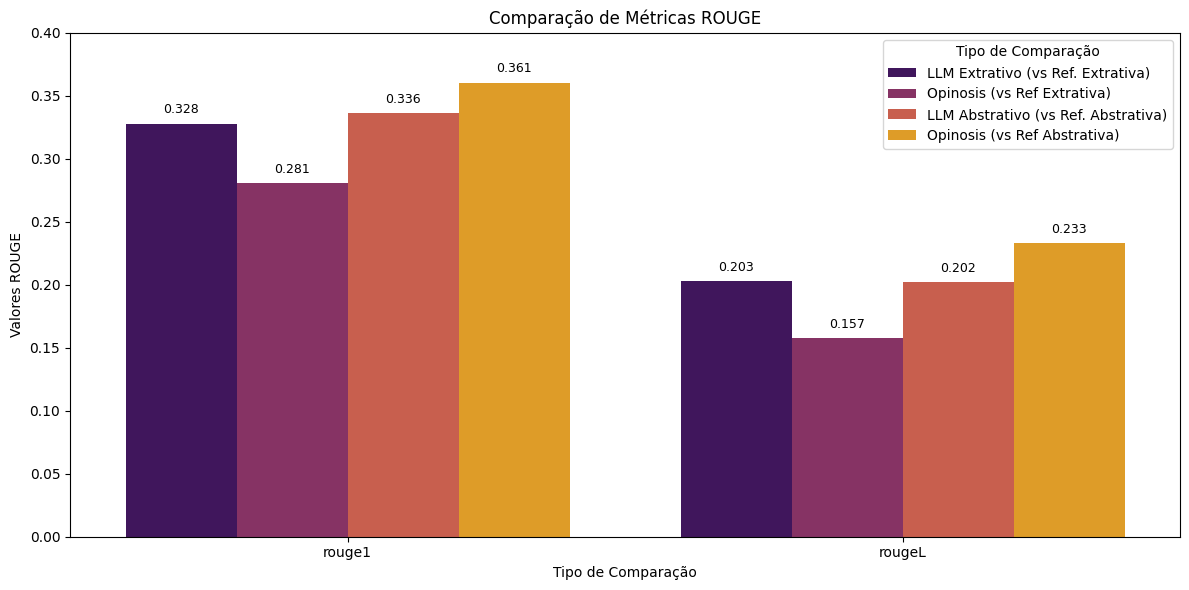

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original data with the correction for 'Valores'
comparacao_rouge = pd.DataFrame({
    'Tipo de Comparação': [
        'LLM Extrativo (vs Ref. Extrativa)',
        'LLM Extrativo (vs Ref. Extrativa)',
        "Opinosis (vs Ref Extrativa)",
        "Opinosis (vs Ref Extrativa)",
        'LLM Abstrativo (vs Ref. Abstrativa)',
        'LLM Abstrativo (vs Ref. Abstrativa)',
        'Opinosis (vs Ref Abstrativa)',
        'Opinosis (vs Ref Abstrativa)'
    ],
    'ROUGE': [
        'rouge1', 'rougeL', 'rouge1', 'rougeL',
        'rouge1', 'rougeL', 'rouge1', 'rougeL'
    ],
    'Valores': [
        0.327967, 0.202985, 0.280731, 0.157356,
        0.336062, 0.202220, 0.360530, 0.232817
    ]
})

# Create the bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
ax = sns.barplot(
    data=comparacao_rouge,
    x='ROUGE',
    y='Valores',
    hue='Tipo de Comparação', # Use 'ROUGE' to differentiate bars within each 'Tipo de Comparação'
    palette='inferno' # Customizing colors
)

plt.ylim(0, 0.40)

plt.title('Comparação de Métricas ROUGE')
plt.xlabel('Tipo de Comparação')
plt.ylabel('Valores ROUGE')
# plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility

for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(f'{p.get_height():.3f}', # Format the score to 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), # 10 points vertical offset
                textcoords='offset points',
                fontsize=9) # Adjust font size as needed

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()